In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

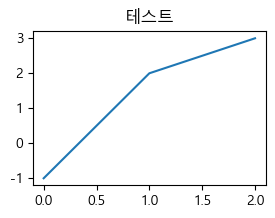

In [2]:
# ----------------------
# 그래프 전역 설정
# ----------------------
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
plt.rc('figure', figsize=(12,5))

pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))
pass

## 데이터 준비

*  행정안전부
    * https://www.mois.go.kr/<br>
    * 정책자료 > 주민등록인구통계>연령별 인구 현황
        * 성별구분하지않음
        * 1세단위
        * 0~100세이상
        * 전체읍면동 현황

In [3]:
# ------------------------
# 데이터프레임 생성
#   - df_all
#   - 천단위 구분자 처리 : thousands
# ------------------------

df = pd.read_csv("C:\\Users\\User\\Documents\\VSCode\\Data School\\data school\\00.data\\인구구조\\202503_202503_연령별인구현황_월간.csv")

In [4]:
df.head()

,행정구역,2025년03월_계_총인구수,2025년03월_계_연령구간인구수,2025년03월_계_0세,2025년03월_계_1세,2025년03월_계_2세,2025년03월_계_3세,2025년03월_계_4세,2025년03월_계_5세,2025년03월_계_6세,...,2025년03월_계_91세,2025년03월_계_92세,2025년03월_계_93세,2025년03월_계_94세,2025년03월_계_95세,2025년03월_계_96세,2025년03월_계_97세,2025년03월_계_98세,2025년03월_계_99세,2025년03월_계_100세 이상
0,서울특별시 (1100000000),"9,335,734","9,335,734","40,432","37,092","39,575","41,936","42,838","45,904","49,637",...,"10,166","7,861","5,973","4,303","3,532","2,592","1,807","1,185",635,"1,506"
1,서울특별시 종로구 (1111000000),"138,184","138,184",425,395,440,467,476,524,521,...,230,180,131,98,59,73,34,37,14,43
2,서울특별시 종로구 청운효자동(1111051500),"10,986","10,986",40,44,43,41,51,45,47,...,22,15,11,10,3,7,1,3,1,4
3,서울특별시 종로구 사직동(1111053000),"8,937","8,937",30,21,34,37,28,39,40,...,19,13,12,7,8,11,3,2,1,7
4,서울특별시 종로구 삼청동(1111054000),"2,189","2,189",7,7,5,7,6,6,5,...,7,6,4,4,3,0,1,1,0,0


In [5]:
# ------------------------
# 컬럼명 변경
#   [ 행정구역, 총인구수, 연령구간인구수, 0세, 1세, ... , 100세이상]
#   split('_')
# ------------------------

df.columns = ['행정구역', '총인구수', '연령구간인구수'] + [f'{i}세' for i in range(0, 100)] + ['100세 이상']

In [6]:
# 모든 열에 대해 쉼표 제거하고 숫자형으로 변환 (첫 번째 열 제외)
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace(',', '').astype(int)

In [7]:
# ------------------------
# 파생컬럼 추가
#   행정구역명 컬럼 추가
# ------------------------

df['행정구역명'] = df['행정구역'].str.split(' ').str[0]

C:\Users\User\AppData\Local\Temp\ipykernel_11500\2366963634.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['행정구역명'] = df['행정구역'].str.split(' ').str[0]


In [8]:
# ------------------------
# 컬럼 삭제
#   - ['총인구수', '연령구간인구수']
# ------------------------

df = df.drop(['총인구수', '연령구간인구수'], axis=1)

## 행정구역 - 연령별 인구구조

#### 데이터 준비

In [9]:
# ------------------------
# 행정구역 단위 연령별 데이터 선택
#   - df_region1
#   - 행정구역 코드가 00000000로 끝나는 데이터 선택
# ------------------------

df_region1 = df[df['행정구역'].str.extract(r'\((\d+)\)')[0].str.endswith('00000000')].copy()

In [10]:
# ------------------------
# 행정구역명 컬럼을 인덱스로 지정
# ------------------------

df_region1.set_index('행정구역명', inplace=True)

In [11]:
# ------------------------
# 행정구역 컬럼을 삭제
# ------------------------

df_region1.drop(columns='행정구역', inplace=True)

In [12]:
# ------------------------
# 행열 전치
# ------------------------

df_region1_T = df_region1.T

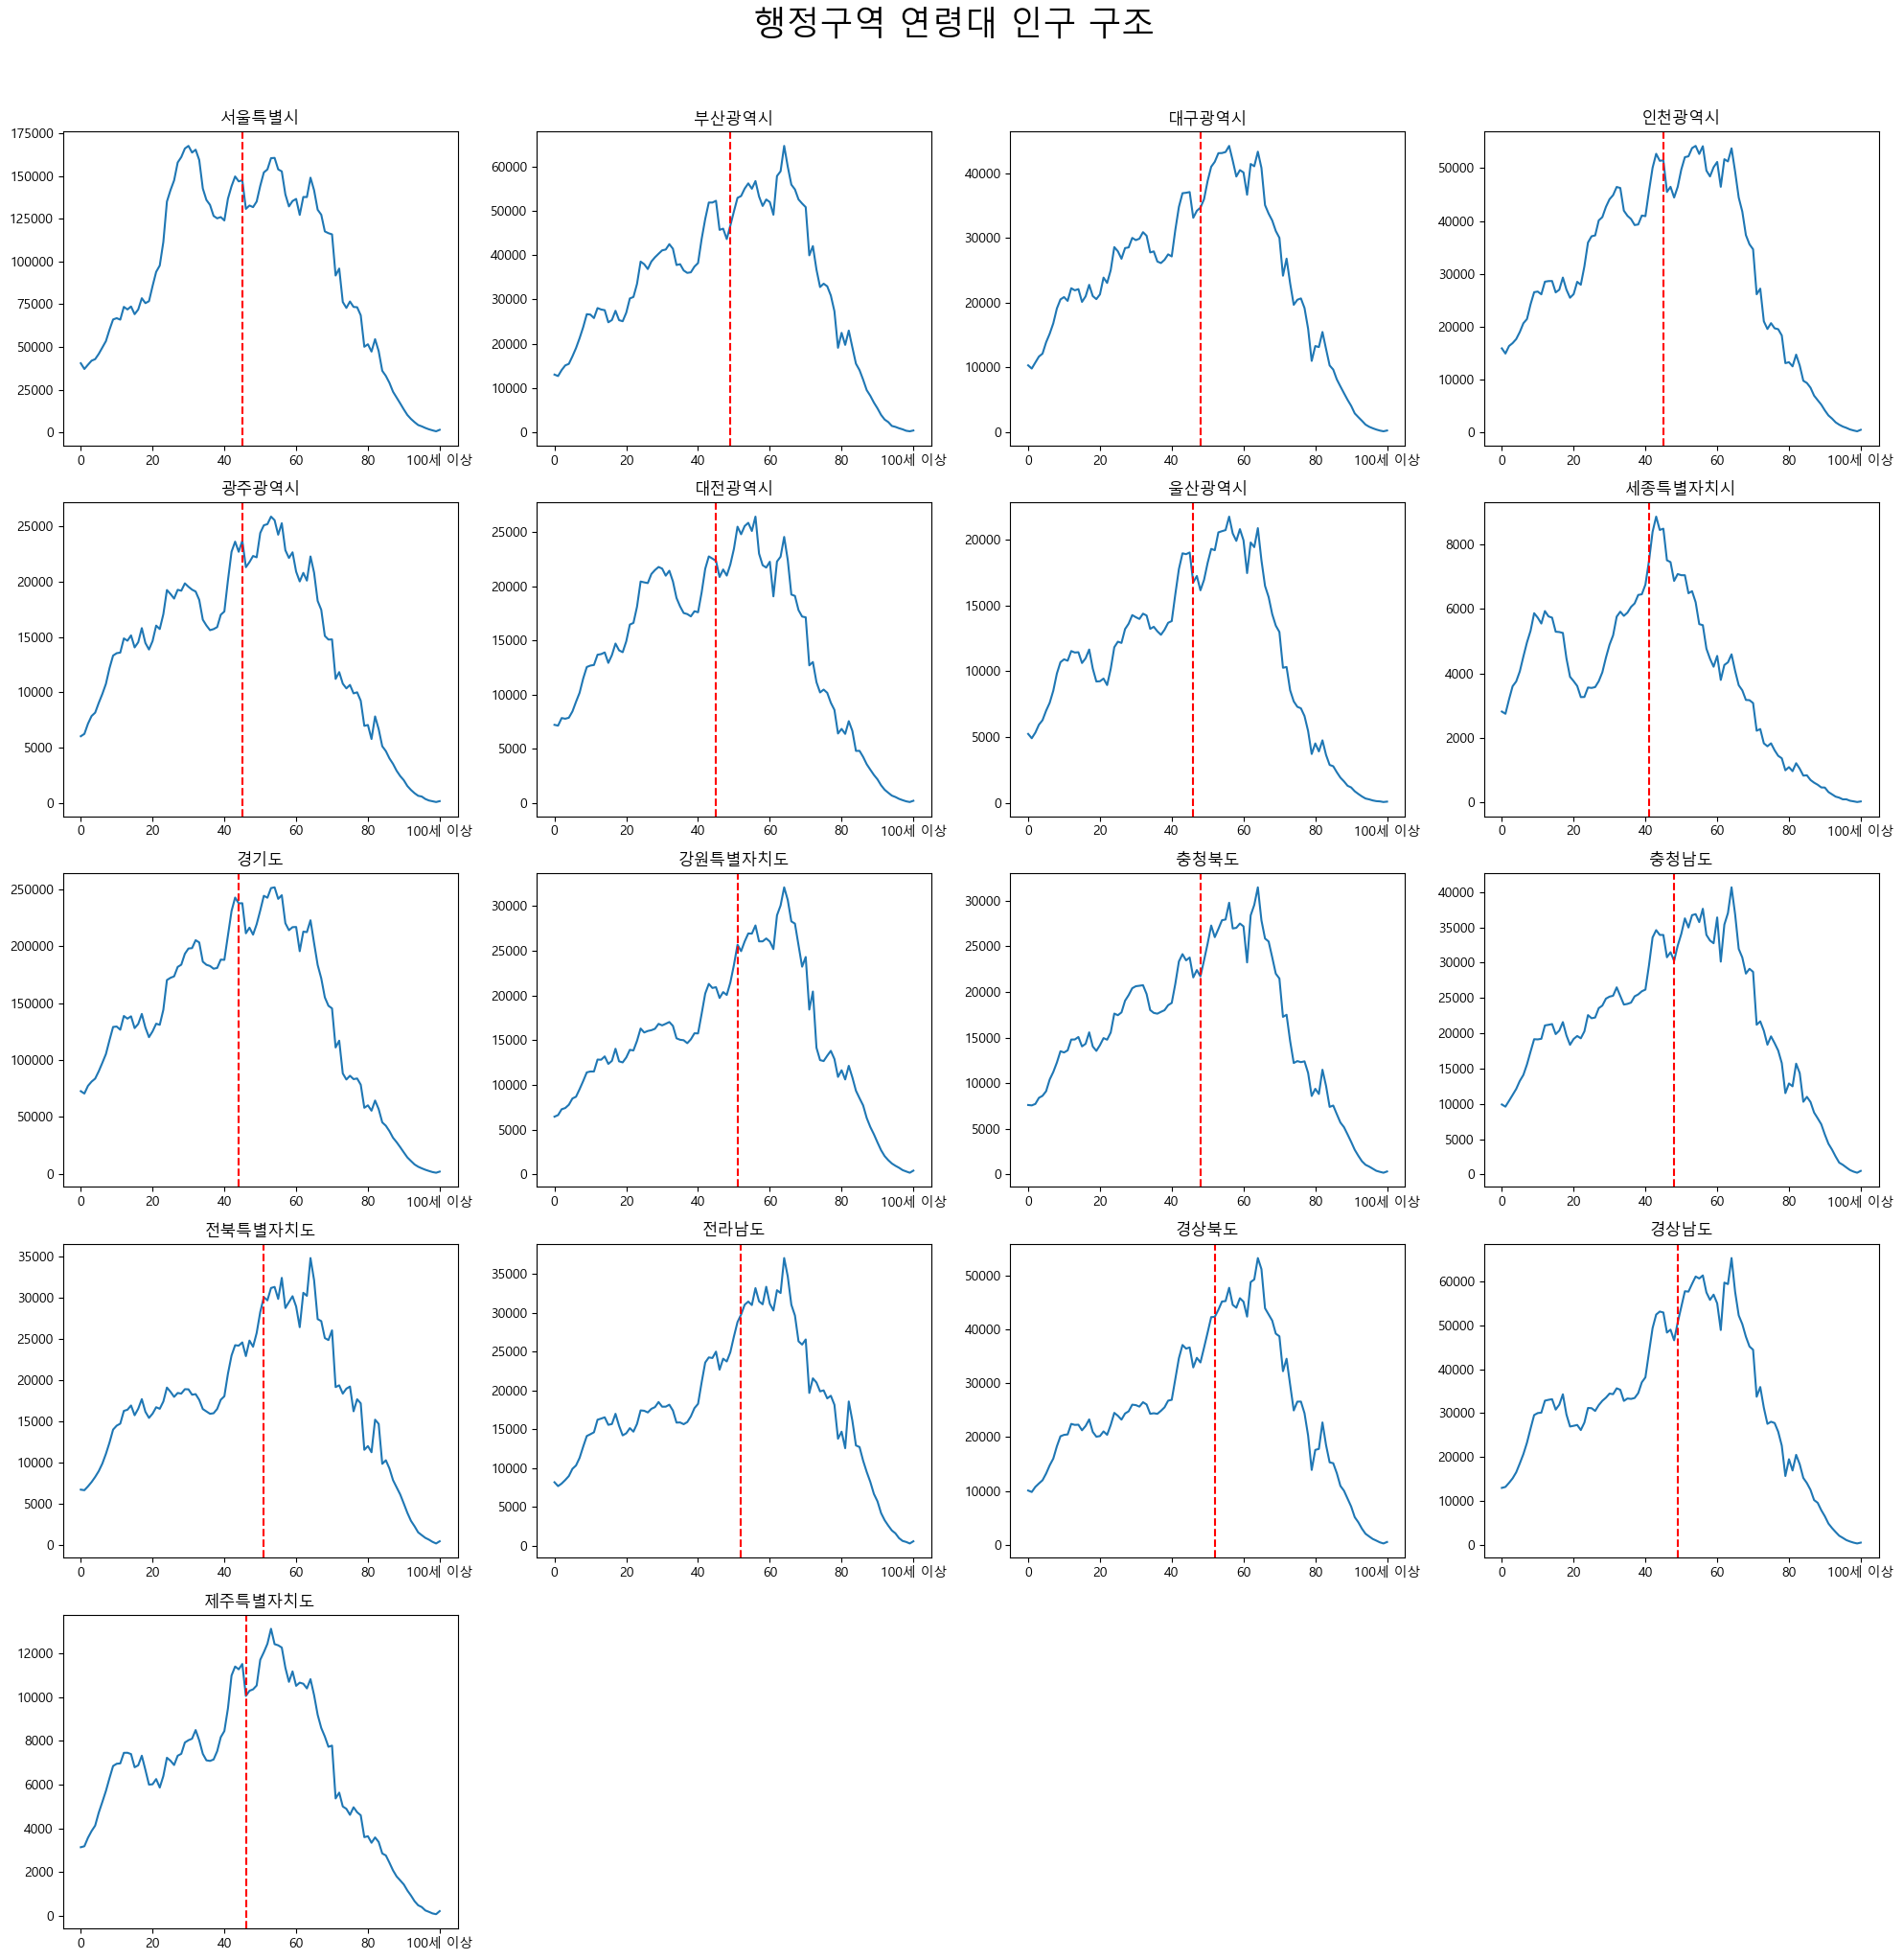

In [31]:
# ---------------------
# 서브플롯
# ---------------------

# x축: 나이 (0세 ~ 100세 이상)
ages = list(range(100)) + ['100세 이상']

# 1. 지역 수 파악
n = len(df_region1_T.columns)  # df_region1_T: 연령별 인구 데이터 (T는 전치)

# 2. subplot 구성
ncols = 4 # 열 수 늘려서 가로로 펼치기
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))  # 가로 넓게
axes = axes.flatten()

# 3. 그래프 그리기

plt.suptitle('행정구역 연령대 인구 구조', fontsize=25, y=1.02)

for i, region in enumerate(df_region1_T.columns):
    ax = axes[i]
    y = df_region1_T[region].values
    ax.plot(ages, y)

    # 누적 인구에서 중위연령 계산
    cum_pop = y.cumsum()
    total_pop = cum_pop[-1]
    median_age_idx = (cum_pop >= total_pop / 2).argmax()

    ax.axvline(x=ages[median_age_idx], color='red', linestyle='--')
    ax.set_title(region)
    ax.set_xticks([0, 20, 40, 60, 80, 100])
    ax.tick_params(axis='x', rotation=0)

# 4. 빈 subplot 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## 시군구-연령별 인구구조

#### 데이터 준비

In [14]:
# ----------------------------------
# 분석할 행정구역 입력받기
#   - 변수명 : region_select
# ----------------------------------

region_select = '서울특별시'

In [15]:
# ----------------------
# 입력받은 행정구역의 시군구 데이터 선택
#   - 변수명 : df_region2
#   - 선택조건1. 행정구역명
#   - 선택조건2. 시군구 행정구역코드는 '000000'(6자리) 로 끝남
#   - 선택조건3. 시군구 행정구역코드는 '00000000'(8자리) 로 끝나지 않음
# ----------------------

df['행정구역코드'] = df['행정구역'].str.extract(r'\((\d+)\)')

df_region2 = df[
    df['행정구역명'].str.contains(region_select) &
    df['행정구역코드'].astype(str).str.endswith('000000') & # 시군구코드: 5개 0
    ~df['행정구역코드'].astype(str).str.endswith('00000000') # 전체 단위 제외
].copy()

C:\Users\User\AppData\Local\Temp\ipykernel_11500\4271202534.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['행정구역코드'] = df['행정구역'].str.extract(r'\((\d+)\)')


In [16]:
df_region2.head()

,행정구역,0세,1세,2세,3세,4세,5세,6세,7세,8세,...,93세,94세,95세,96세,97세,98세,99세,100세 이상,행정구역명,행정구역코드
1,서울특별시 종로구 (1111000000),425,395,440,467,476,524,521,599,703,...,131,98,59,73,34,37,14,43,서울특별시,1111000000
19,서울특별시 중구 (1114000000),572,436,484,502,518,492,490,516,581,...,105,82,71,51,44,25,6,21,서울특별시,1114000000
35,서울특별시 용산구 (1117000000),1007,848,954,936,962,1039,987,1040,1123,...,205,122,104,77,50,33,19,54,서울특별시,1117000000
52,서울특별시 성동구 (1120000000),1616,1383,1438,1593,1500,1575,1538,1616,1765,...,160,116,97,74,44,34,12,35,서울특별시,1120000000
86,서울특별시 동대문구 (1123000000),1513,1449,1577,1532,1653,1761,1747,1888,2007,...,207,155,130,95,57,39,18,51,서울특별시,1123000000


In [17]:
# ----------------------
# 시군구명 칼럼 생성
# ----------------------

df_region2['행정구역명'] = df_region2['행정구역'].str.split(' ').str[1]

In [18]:
# ------------------------
# 시군구명 컬럼을 인덱스로 지정
# ------------------------

df_region2.set_index('행정구역명', inplace=True)

In [19]:
# ------------------------
# ['행정구역', '행정구역명'] 칼럼 삭제
# ------------------------

df_region2.drop(columns=['행정구역','행정구역코드'], inplace=True)

In [20]:
# ------------------------
# 행렬 전치
#   df_region2_t
# ------------------------

df_region2_t = df_region2.T

#### 시각화

In [27]:
# ----------------
# 시군구 갯수(서브플롯 갯수)
#   axes_cnt
# ----------------
regions = df_region2_t.columns.tolist()
axes_cnt = len(regions)


# ----------------
# 서브플롯 행의 갯수
#   row_cnt
# ----------------
cols = 4
rows = math.ceil(axes_cnt / cols)
fig_height = rows * 4


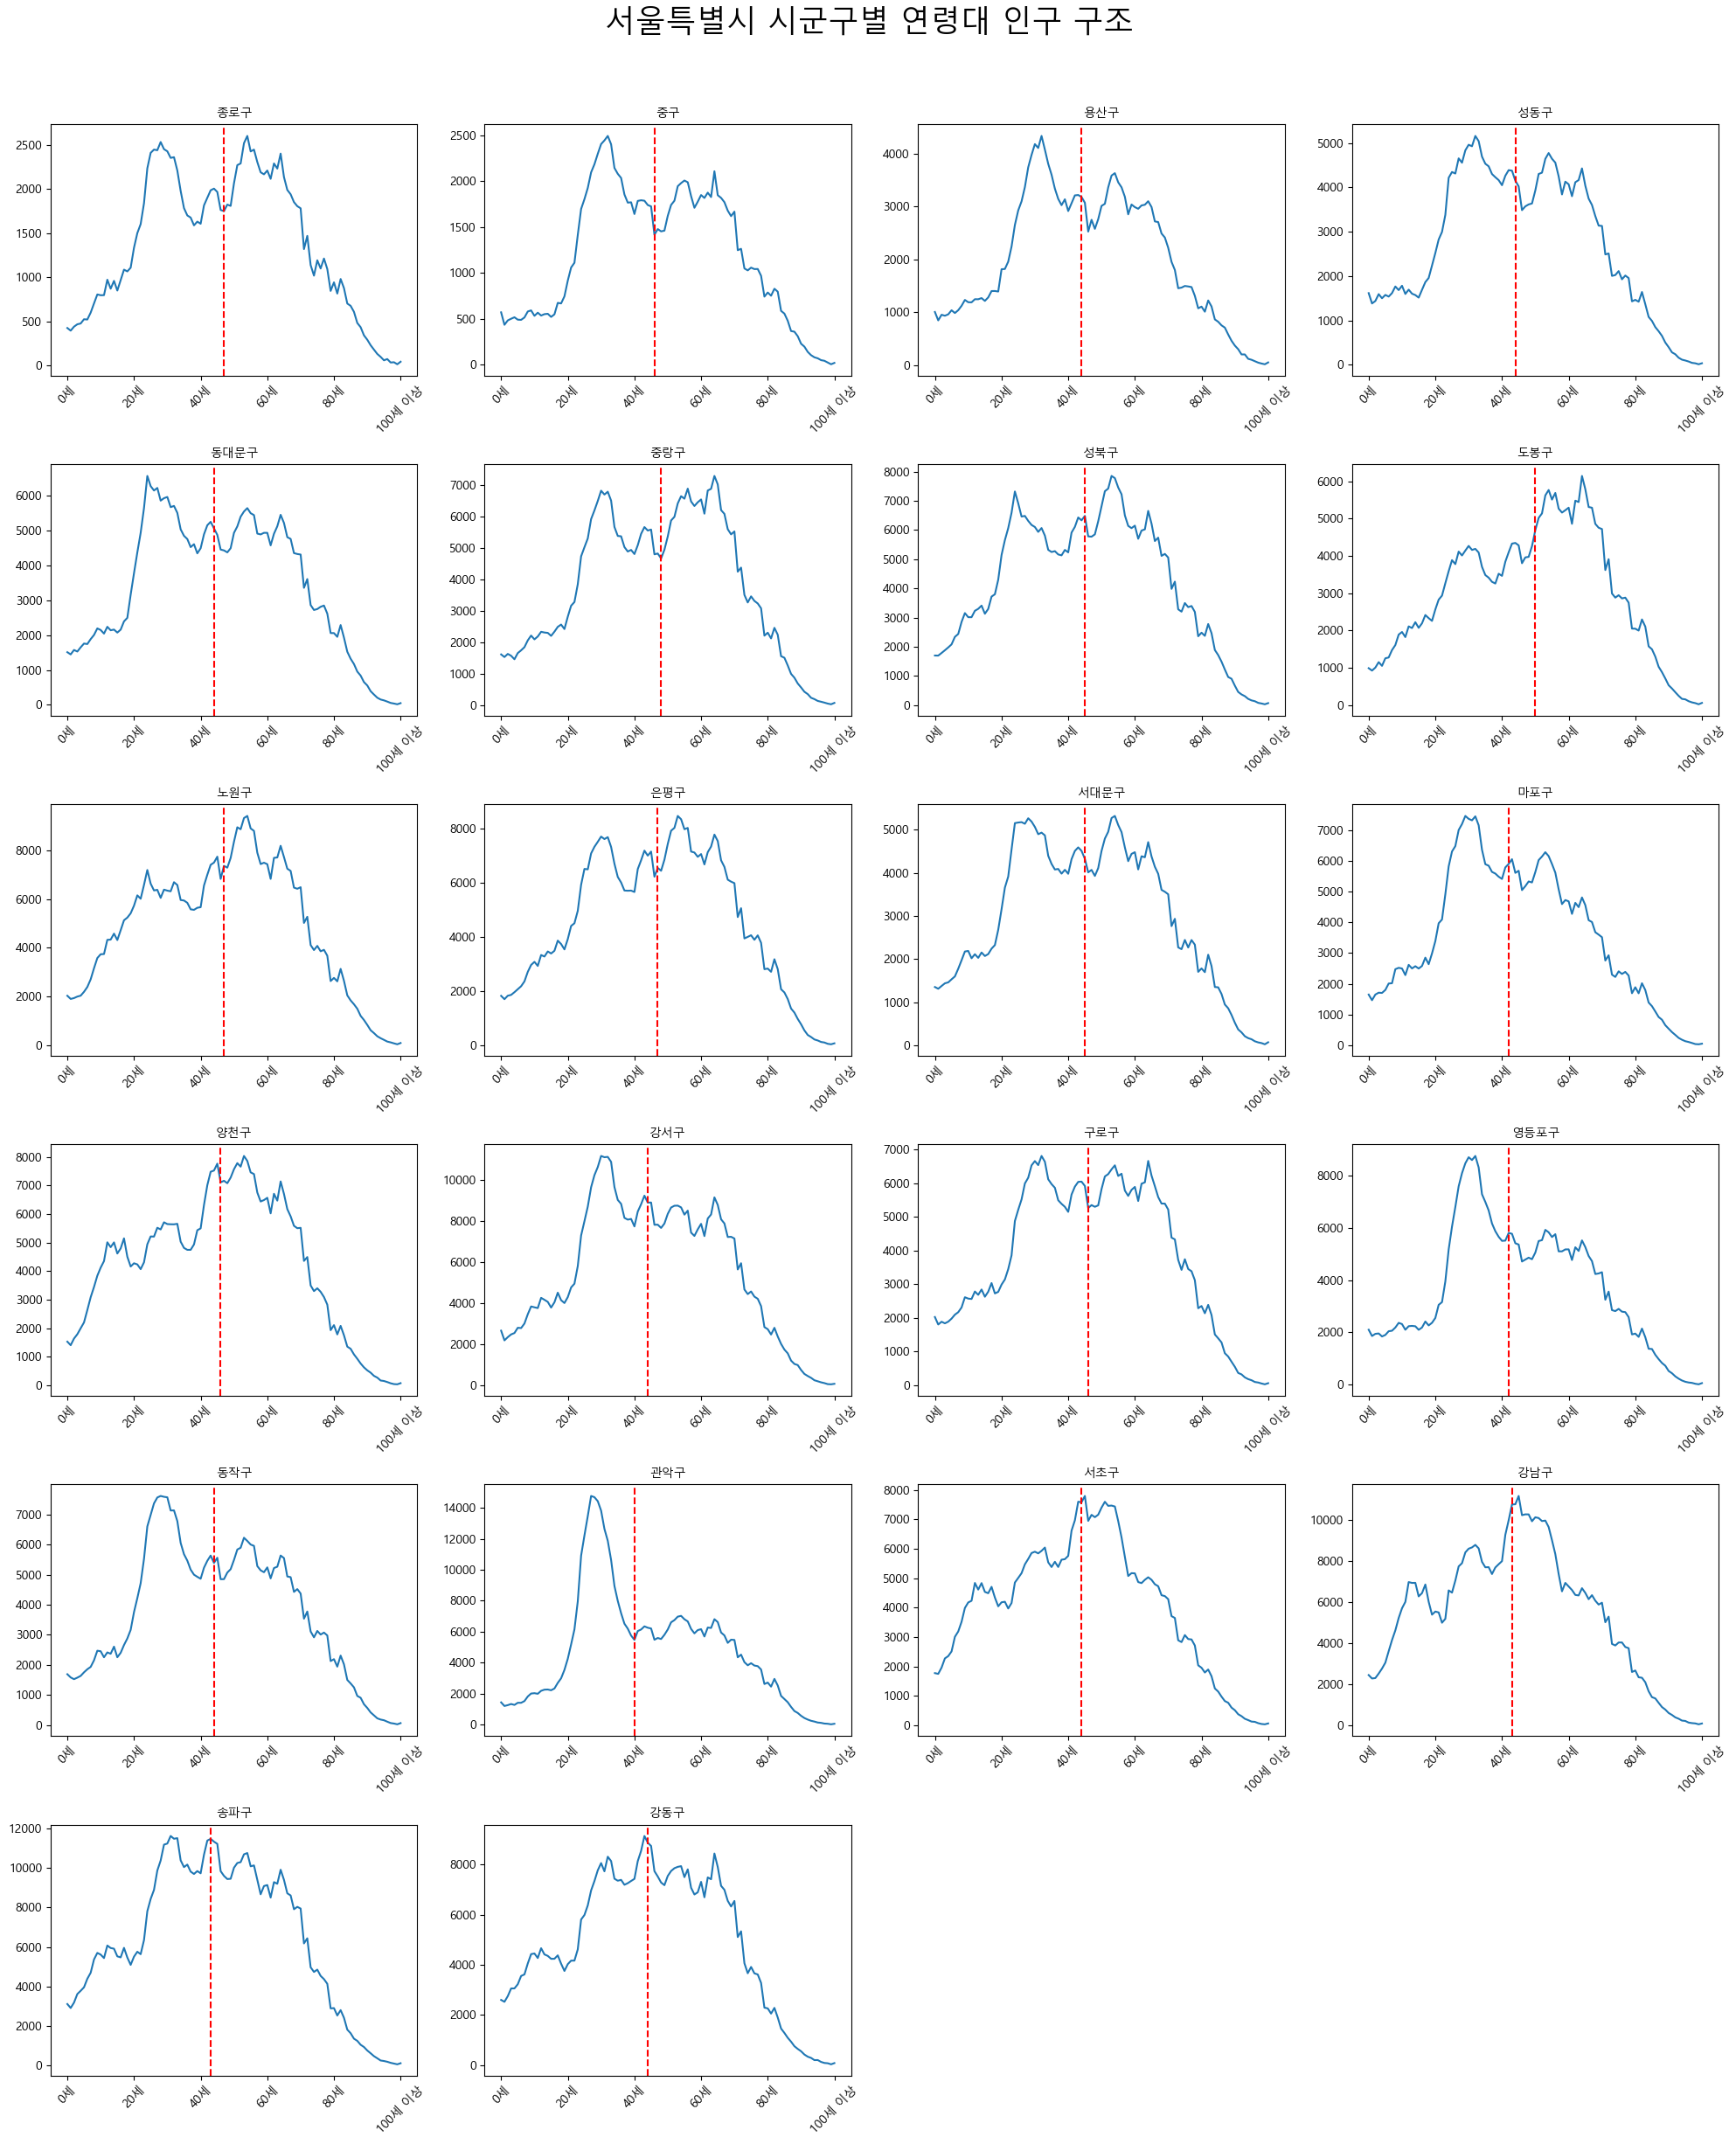

In [30]:
# ----------------
# 서브플롯 세로 크기
#   fig_height
# ----------------
fig, axes = plt.subplots(rows, cols, figsize=(20, fig_height))
axes = axes.flatten()

# ---------------------
# 서브플롯
# ---------------------

plt.suptitle('서울특별시 시군구별 연령대 인구 구조', fontsize=25, y=1.02)

ages = df_region2_t.index.tolist()

# 시군구별 그래프 그리기
for i, region in enumerate(regions):
    ax = axes[i]
    y = df_region2_t[region].values

    ax.plot(ages, y)

    # 중앙값 위치에 빨간 선
    cum_pop = y.cumsum()
    total_pop = cum_pop[-1]
    median_idx = (cum_pop >= total_pop / 2).argmax()
    
    ax.axvline(median_idx, color='red', linestyle='--')
    ax.set_title(region, fontsize=10)
    ax.set_xticks([0, 20, 40, 60, 80, 100])
    ax.tick_params(axis='x', rotation=45)

# 남는 축 제거
for j in range(axes_cnt, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 1. **전국 시도 단위 인구 구조**
- **서울특별시**, **부산광역시**, **대구광역시** 등 대도시는 **30~50대 연령층**이 두드러지며, **고령화가 진전**된 모습도 일부 관찰됨.
- **경기도**, **인천광역시**는 유소년층(0~14세)의 비율도 상대적으로 높아, **젊은 인구 유입**이 꾸준한 것으로 보임.
- **전남, 경북, 강원도** 등 일부 지역은 인구 피라미드가 **상대적으로 상단에 치우쳐져** 있으며, 이는 **고령화가 심각**하다는 것을 의미함.
- **세종특별자치시**는 **젊은 인구의 급격한 유입**이 이루어져 **30대 전후** 인구가 가장 많음.

#### **시도별 중위 연령 위치(빨간선)**
- **수도권(서울, 경기, 인천)** 과 **세종시**는 중위 연령이 **낮음(젊음)**.
- **전남, 경북, 강원 등 농촌 중심 지역**은 중위 연령이 **60세에 가까움**, **초고령 사회 진입** 추정.

## 2. **서울 시군구별 연령 구조**
- **강남구, 송파구, 강서구, 노원구** 등은 인구 분포가 **넓게 퍼져 있음**, **30~50대 인구 중심**, **자녀 인구도 상대적으로 존재**.
- **관악구, 동작구, 성북구 등은 20~30대 비율이 높음** → 대학가 밀집 지역, 1인 가구 밀집 지역 특성 반영.
- **중구, 종로구, 은평구**는 **고령 인구 비율이 높고**, 중위 연령이 **위쪽으로 이동**되어 있음 → 인구 감소 및 고령화 진행 중.

#### **서울시 시군구 중위 연령 비교**
- **가장 젊은 지역**: 관악구, 노원구, 강서구
- **가장 고령화된 지역**: 종로구, 중구

## 결론
#### 1. **고령화 대응 전략 필요**
- 고령 인구 비율이 높은 지역(예: 전남, 강원도, 서울 종로구 등)은 **복지 정책** 및 **의료 인프라** 집중 필요.
- 서울시 내에서도 **도심 고령화 현상**이 확인되므로 **도심형 고령자 복지 서비스** 기획 필요.

#### 2. **유소년 인구 유지 및 유입**
- 젊은 인구 유입이 많은 세종시, 경기 북부(남양주, 고양 등)는 **교육, 육아 인프라 확장** 필요.
- 반대로 아동 인구가 적은 도심지나 고령화 지역에는 **정책적 출산 장려 및 유입 유도 방안** 필요.

#### 3. **지역 맞춤형 정책 기획**
- 인구 구조에 따라 **도시별/구별 특화된 정책 기획** 가능:
  - **젊은층 많은 지역**: 창업지원, 청년주거정책, 교육사업
  - **고령층 많은 지역**: 복지시설 확대, 고령 친화적 도시 환경 조성